# Telemarketing example

## Data import

In [70]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('telemarketing_train.csv')


In [71]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,admin.,married,basic.9y,no,yes,no,cellular,aug,wed,...,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,1
1,52,admin.,single,university.degree,no,yes,no,cellular,jun,mon,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,1
2,45,housemaid,married,basic.4y,no,no,no,cellular,aug,wed,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0


In [72]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64

In [73]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
14995,51,admin.,married,basic.6y,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
14996,53,housemaid,married,basic.4y,unknown,no,no,cellular,jul,tue,...,20,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
14997,41,management,married,unknown,no,yes,no,cellular,may,fri,...,5,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,0
14998,34,admin.,single,university.degree,no,yes,no,cellular,aug,fri,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
14999,51,admin.,single,university.degree,no,no,no,cellular,jun,fri,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2,1


## Split categorical/continuos variables

In [74]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
target              int64
dtype: object

In [75]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,admin.,married,basic.9y,no,yes,no,cellular,aug,wed,success
1,admin.,single,university.degree,no,yes,no,cellular,jun,mon,nonexistent
2,housemaid,married,basic.4y,no,no,no,cellular,aug,wed,nonexistent
3,management,single,university.degree,no,no,no,telephone,may,tue,nonexistent
4,technician,single,university.degree,no,yes,yes,cellular,nov,fri,nonexistent


In [76]:
df_numerical=df.select_dtypes(include=['int64','float64'])
df_numerical.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,73,1,4,1,-2.9,92.201,-31.4,0.879,5076.2,1
1,52,327,1,999,0,-2.9,92.963,-40.8,1.266,5076.2,1
2,45,188,5,999,0,1.4,93.444,-36.1,4.964,5228.1,0
3,32,237,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,32,1162,2,999,0,-0.1,93.200,-42.0,4.021,5195.8,0


In [77]:
df_numerical.columns


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'target'],
      dtype='object')

In [78]:
df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'target']]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,73,1,4,1,-2.9,92.201,-31.4,0.879,5076.2,1
1,52,327,1,999,0,-2.9,92.963,-40.8,1.266,5076.2,1
2,45,188,5,999,0,1.4,93.444,-36.1,4.964,5228.1,0
3,32,237,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,32,1162,2,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...
14995,51,253,1,999,0,1.1,93.994,-36.4,4.856,5191.0,0
14996,53,165,20,999,0,1.4,93.918,-42.7,4.961,5228.1,0
14997,41,163,5,999,1,-1.8,92.893,-46.2,1.250,5099.1,0
14998,34,82,3,999,0,1.4,93.444,-36.1,4.964,5228.1,0


## Categorical data

In [79]:
df_categorical.shape

(15000, 10)

In [80]:
df.marital

0        married
1         single
2        married
3         single
4         single
          ...   
14995    married
14996    married
14997    married
14998     single
14999     single
Name: marital, Length: 15000, dtype: object

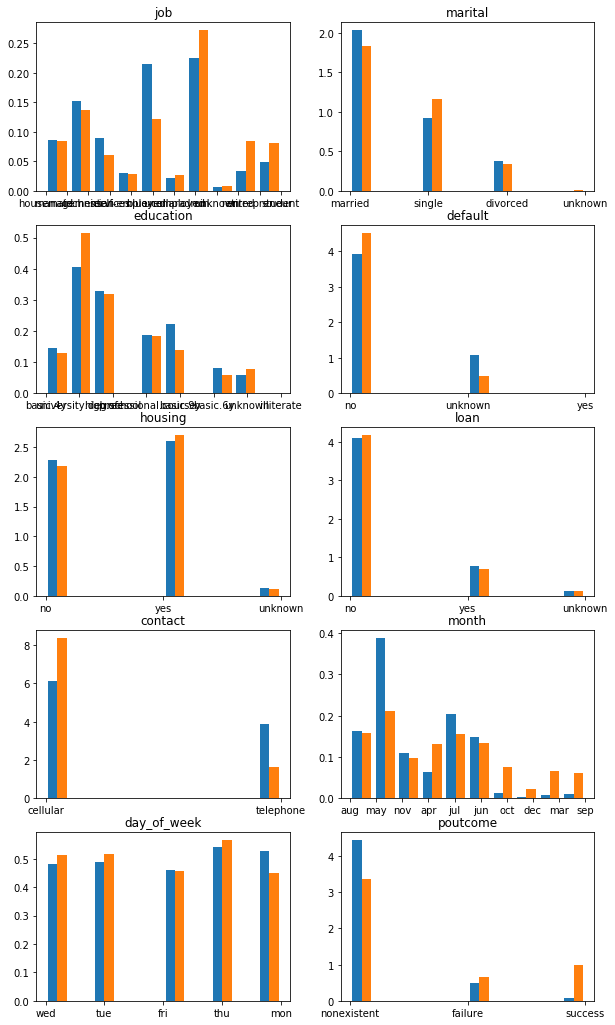

In [81]:
df_0=df_categorical[df['target']==0] # records wih target==0
df_1=df_categorical[df['target']==1] # records wih target==1


fig, axes = plt.subplots(5, 2,figsize=[10,18])
axes = axes.flatten()
i=0
for x in df_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()


In [82]:
df_categorical.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [83]:
dummies = pd.get_dummies(df_categorical[['marital', 'education', 'default','housing', 'loan', 'contact',
       'month', 'poutcome']],drop_first=True) 

#dummies = pd.get_dummies(df_categorical[['job', 'education',  'contact', 'month', 'poutcome']],drop_first=True) 

dummies.tail()

,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
14995,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
14996,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
14997,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
14998,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14999,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


## Numerical data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f951fe74950>,
      dtype=object)

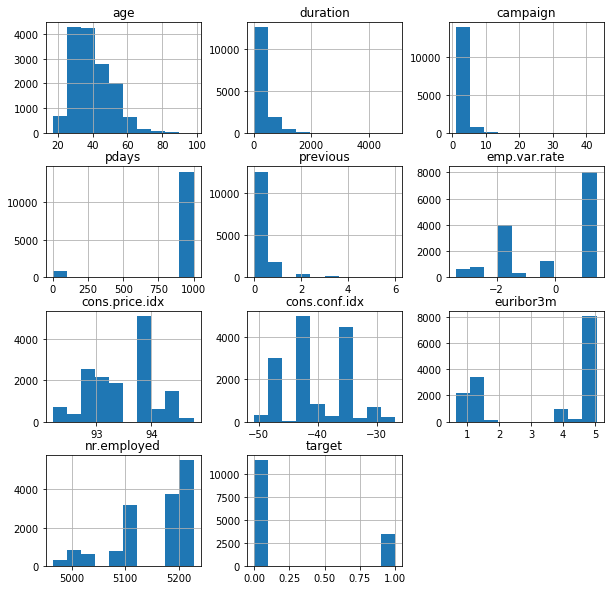

In [84]:
df_numerical.hist(figsize=(10,10))

In [85]:
df_numerical.previous

0        1
1        0
2        0
3        0
4        0
        ..
14995    0
14996    0
14997    1
14998    0
14999    0
Name: previous, Length: 15000, dtype: int64

In [86]:
import math
pd.options.mode.chained_assignment = None

df_numerical['logcampaign']=df_numerical['campaign'].apply(math.log)
df_numerical['logduration']=df_numerical['duration'].apply(math.log)
df_numerical['logprevious']=df_numerical['previous'].apply(lambda x: math.log(x+1))

In [87]:
df_numerical.head(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,logcampaign,logduration,logprevious
0,56,73,1,4,1,-2.9,92.201,-31.4,0.879,5076.2,1,0.000000,4.290459,0.693147
1,52,327,1,999,0,-2.9,92.963,-40.8,1.266,5076.2,1,0.000000,5.789960,0.000000
2,45,188,5,999,0,1.4,93.444,-36.1,4.964,5228.1,0,1.609438,5.236442,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f951755a4d0>,
      dtype=object)

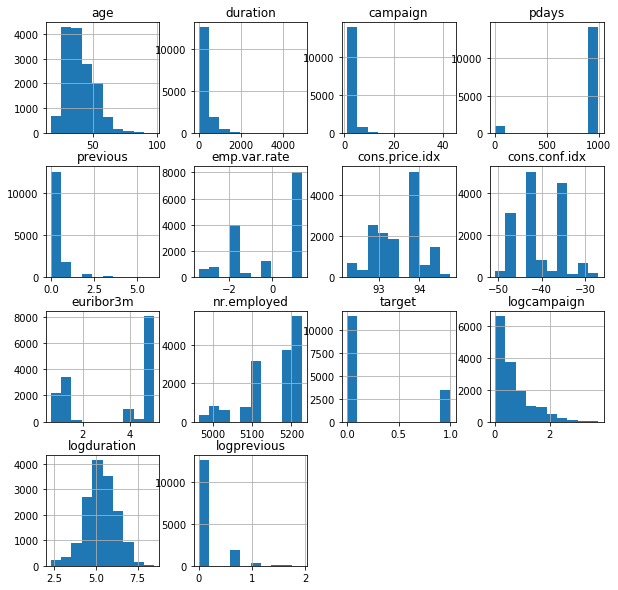

In [88]:
df_numerical.hist(figsize=(10,10))

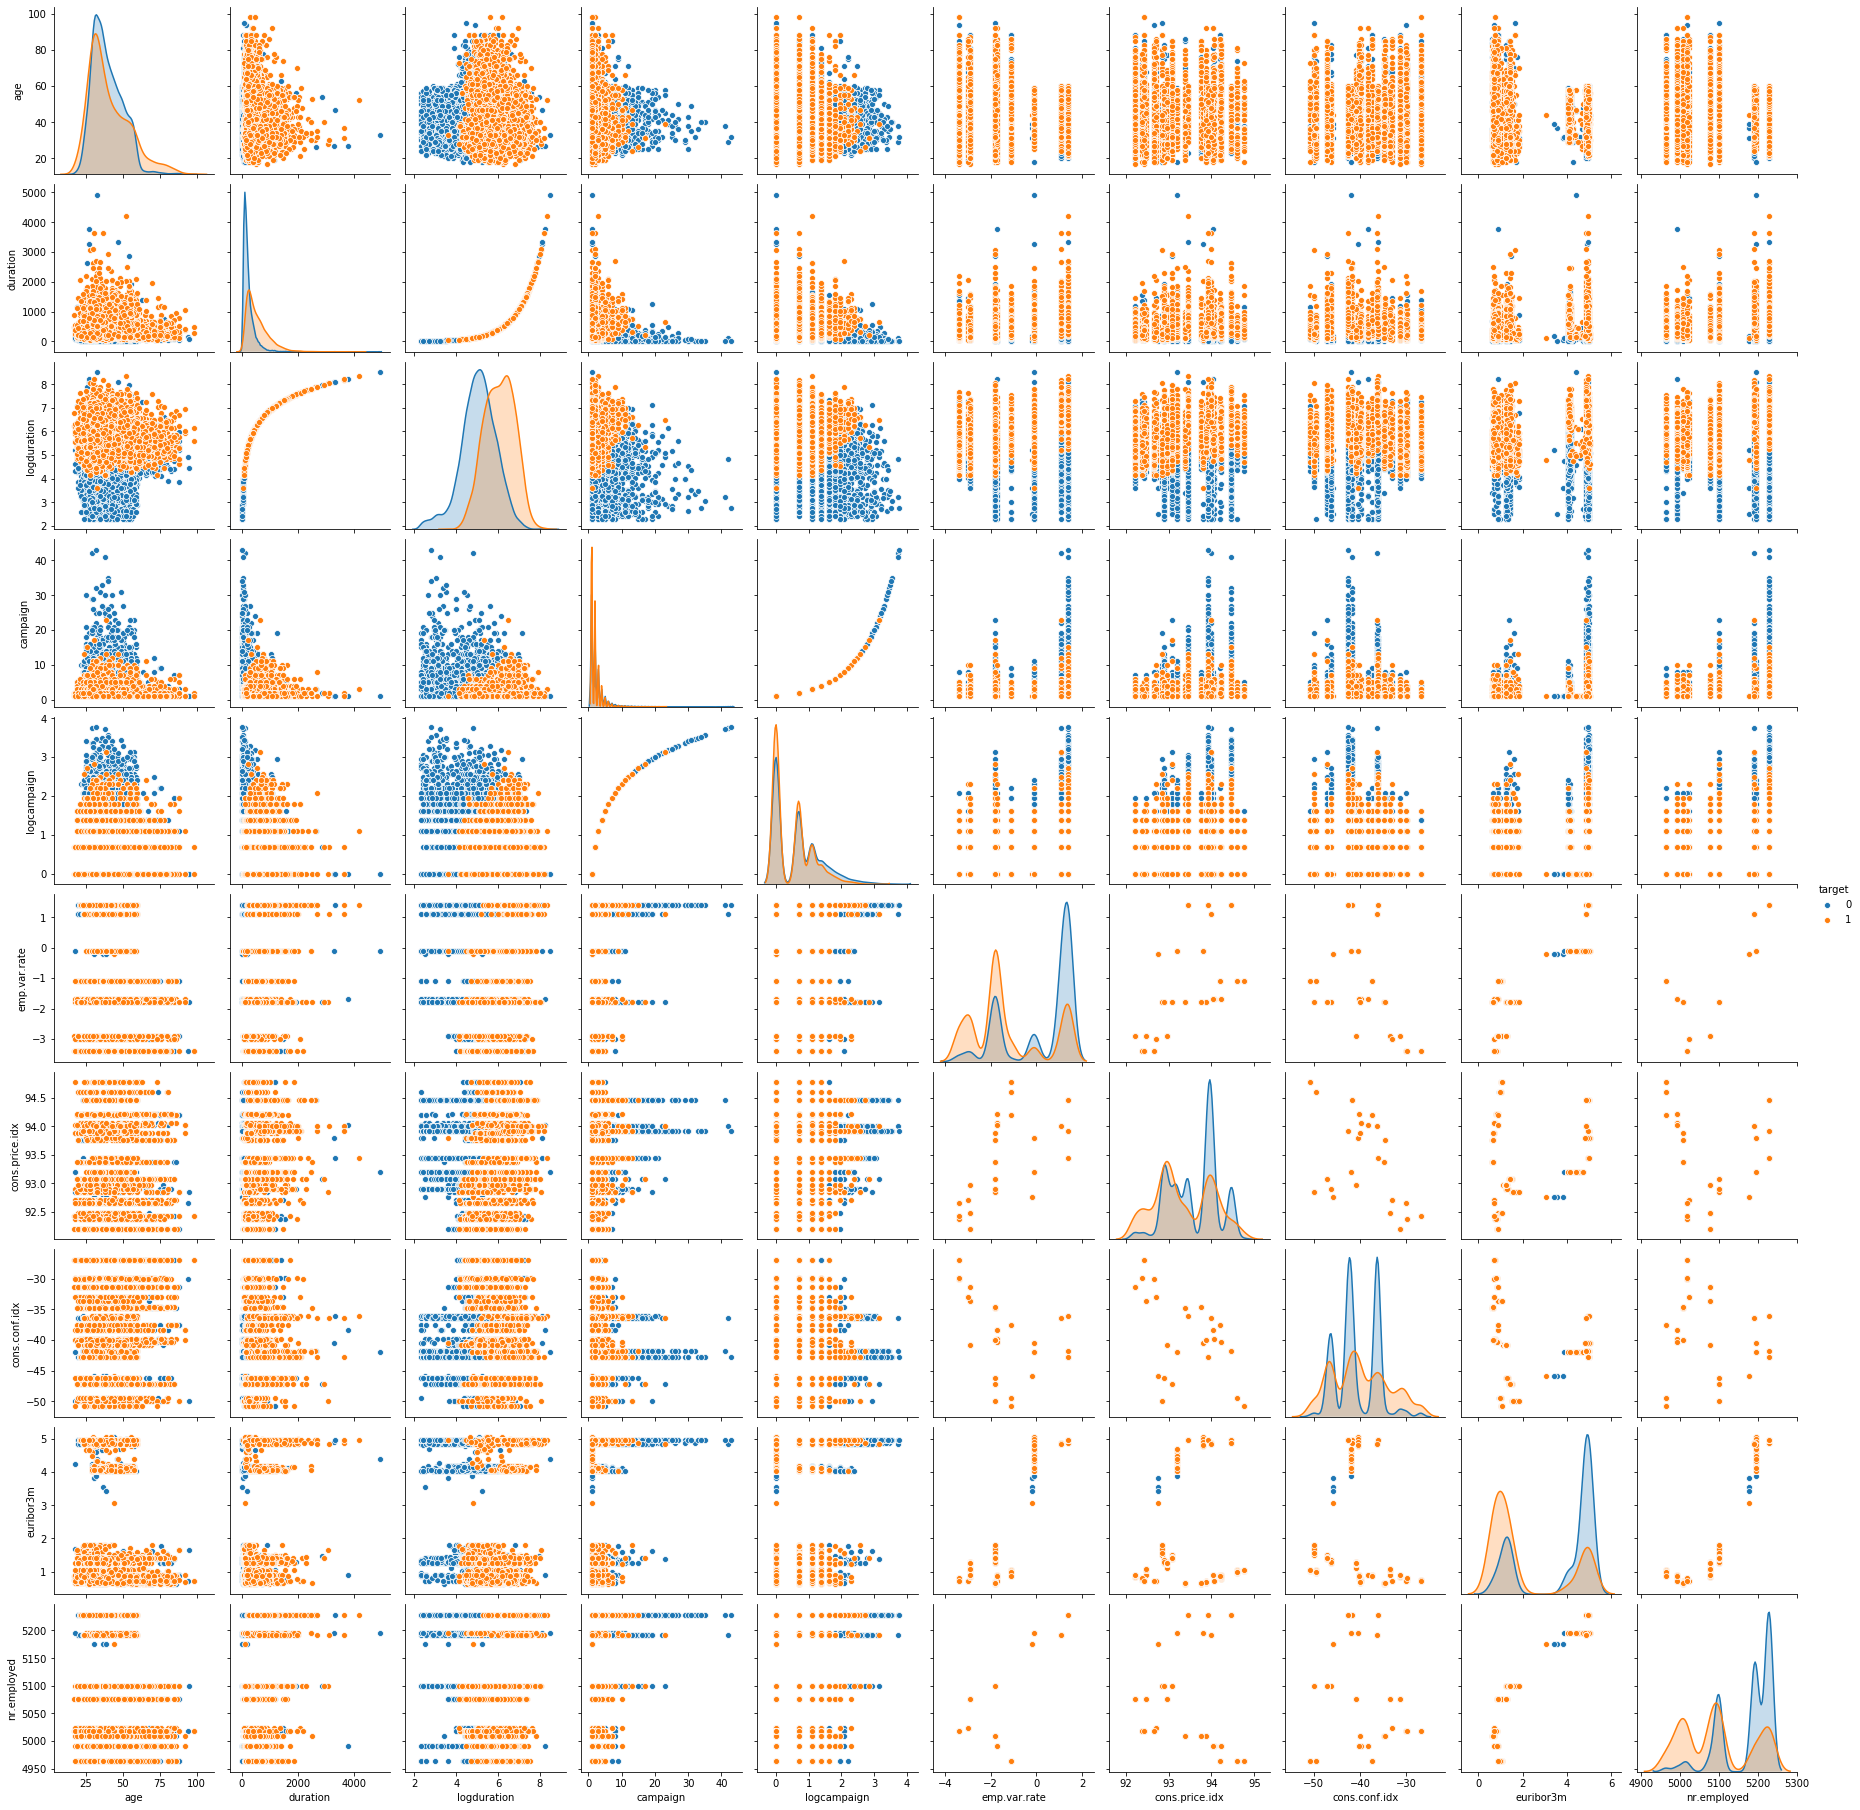

In [90]:
sns.pairplot(df_numerical[['age','duration','logduration','campaign','logcampaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','target']], hue='target')

## Standarize

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

scaled_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,logcampaign,logduration,logprevious
0,1.444850,-0.746982,-0.571300,-3.969061,1.366417,-1.706389,-2.254135,1.860592,-1.400757,-1.031304,1.830396,-0.921744,-1.093925,1.773840
1,1.082169,0.100012,-0.571300,0.252494,-0.378985,-1.706389,-0.979221,-0.075950,-1.187102,-1.031304,1.830396,-0.921744,0.536599,-0.417764
2,0.447476,-0.363501,0.974844,0.252494,-0.378985,0.910934,-0.174453,0.892321,0.854483,0.901546,-0.546330,1.446222,-0.065284,-0.417764
3,-0.731238,-0.200104,-0.184764,0.252494,-0.378985,0.728330,0.745760,0.830517,0.795410,0.429467,-0.546330,0.098083,0.186572,-0.417764
4,-0.731238,2.884420,-0.184764,0.252494,-0.378985,-0.002086,-0.582693,-0.323168,0.333873,0.490545,-0.546330,0.098083,1.915326,-0.417764


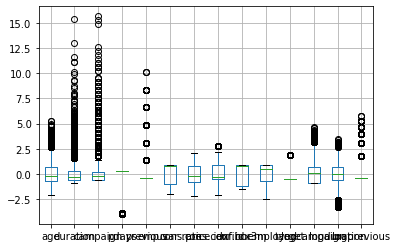

In [92]:
scaled_df.boxplot()

In [93]:
scaled_df.tail()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,logcampaign,logduration,logprevious
14995,0.991498,-0.146750,-0.571300,0.252494,-0.378985,0.728330,0.745760,0.830517,0.794858,0.429467,-0.546330,-0.921744,0.257610,-0.417764
14996,1.172839,-0.440197,6.772887,0.252494,-0.378985,0.910934,0.618604,-0.467378,0.852827,0.901546,-0.546330,3.485877,-0.207183,-0.417764
14997,0.084795,-0.446866,0.974844,0.252494,1.366417,-1.036841,-1.096339,-1.188431,-1.195936,-0.739913,-0.546330,1.446222,-0.220444,1.773840
14998,-0.549897,-0.716970,0.201772,0.252494,-0.378985,0.910934,-0.174453,0.892321,0.854483,0.901546,-0.546330,0.694644,-0.967506,-0.417764
14999,0.991498,-0.460205,-0.184764,0.252494,-0.378985,-1.706389,-0.979221,-0.075950,-1.185998,-1.031304,1.830396,0.098083,-0.247461,-0.417764


In [94]:
#X_numerical=scaled_df[['age','logduration','logprevious','logcampaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
X_numerical=scaled_df[['age','logduration','logcampaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [95]:
dummies.tail(3)

,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
14997,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
14998,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14999,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [96]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

(15000, 28)
(15000, 8)


,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
14995,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
14996,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
14997,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
14998,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14999,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [97]:
X=pd.concat([dummies,X_numerical], axis = 1)
X.tail()

,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,...,poutcome_nonexistent,poutcome_success,age,logduration,logcampaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
14995,1,0,0,1,0,0,0,0,0,0,...,1,0,0.991498,0.257610,-0.921744,0.728330,0.745760,0.830517,0.794858,0.429467
14996,1,0,0,0,0,0,0,0,0,0,...,1,0,1.172839,-0.207183,3.485877,0.910934,0.618604,-0.467378,0.852827,0.901546
14997,1,0,0,0,0,0,0,0,0,1,...,0,0,0.084795,-0.220444,1.446222,-1.036841,-1.096339,-1.188431,-1.195936,-0.739913
14998,0,1,0,0,0,0,0,0,1,0,...,1,0,-0.549897,-0.967506,0.694644,0.910934,-0.174453,0.892321,0.854483,0.901546
14999,0,1,0,0,0,0,0,0,1,0,...,1,0,0.991498,-0.247461,0.098083,-1.706389,-0.979221,-0.075950,-1.185998,-1.031304


### Separate Train/Test sets


In [98]:
y=df['target']

In [99]:
y.shape

(15000,)

In [100]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(10500, 36) (4500, 36)


## Models

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [102]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,1000,100)}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1      train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
    print("")
    print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))



In [103]:
hyperp_search(classifier,parameters)

f1_train: 0.622308 using {'n_neighbors': 10}
f1      train 0.701   test 0.621
precision  train 0.796   test 0.728

[[3257  209]
 [ 474  560]]


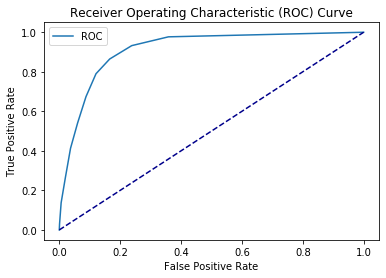

AUC: 0.91


In [104]:
model_knn = KNeighborsClassifier(n_neighbors=10)

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)

In [105]:
#Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,10],
              'min_samples_split': [20],
              'min_samples_leaf': [10]}

hyperp_search(classifier,parameters)


f1_train: 0.735926 using {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20}
f1      train 0.736   test 0.718
precision  train 0.766   test 0.762

[[3246  220]
 [ 331  703]]


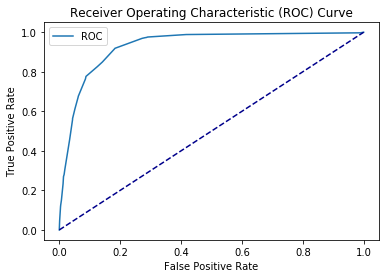

AUC: 0.93


In [106]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)

fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)


## Plotting the tree 

In [107]:
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=3)
print(r)


|--- nr.employed <= -0.89
|   |--- logduration <= -0.25
|   |   |--- poutcome_success <= 0.50
|   |   |   |--- cons.price.idx <= 0.67
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- cons.price.idx >  0.67
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- poutcome_success >  0.50
|   |   |   |--- logcampaign <= 0.40
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- logcampaign >  0.40
|   |   |   |   |--- class: 0
|   |--- logduration >  -0.25
|   |   |--- poutcome_success <= 0.50
|   |   |   |--- logduration <= 0.22
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- logduration >  0.22
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- poutcome_success >  0.50
|   |   |   |--- euribor3m <= -1.40
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- euribor3m >  -1.40
|   |   |   |   |--- truncated branch of depth 2
|--- nr.employed >  -0.89
|   |--- logduration <= 0.94
|   |   |--- cons.conf.idx <= -1.2

In [108]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.5936859368593685
f1_test:  0.5936859368593685
[[2785  681]
 [ 310  724]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      3466
           1       0.52      0.70      0.59      1034

    accuracy                           0.78      4500
   macro avg       0.71      0.75      0.72      4500
weighted avg       0.81      0.78      0.79      4500



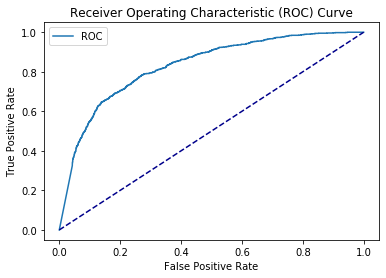

AUC: 0.83


In [109]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)


In [110]:
# Logistic

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[1000] }


hyperp_search(classifier,parameters)


f1_train: 0.713405 using {'C': 1, 'max_iter': 1000}
f1      train 0.719   test 0.692
precision  train 0.767   test 0.739

[[3229  237]
 [ 362  672]]


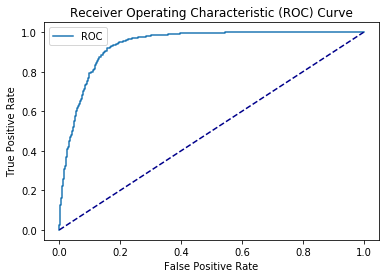

AUC: 0.94


In [111]:
model = LogisticRegression(C=10, max_iter=1000)

fpr4,tpr4=roc(model,X_train,y_train,X_test,y_test)


In [112]:
model.fit(X_train,y_train)

for i in range(len(X_train.columns)) :
    print('%s : %.4f' % (X_train.columns[i], model.coef_[0,i]))

marital_married : -0.0092
marital_single : 0.0963
marital_unknown : 0.3683
education_basic.6y : -0.0232
education_basic.9y : -0.1044
education_high.school : 0.0458
education_illiterate : -0.5630
education_professional.course : 0.1542
education_university.degree : 0.2567
education_unknown : 0.1359
default_unknown : -0.2481
default_yes : -0.0600
housing_unknown : -0.0408
housing_yes : 0.0447
loan_unknown : -0.0408
loan_yes : -0.1290
contact_telephone : -0.5283
month_aug : 1.2702
month_dec : 0.0943
month_jul : -0.0782
month_jun : -1.0595
month_mar : 2.4962
month_may : -0.7414
month_nov : -0.9369
month_oct : 0.1080
month_sep : -0.1752
poutcome_nonexistent : 0.4317
poutcome_success : 2.1834
age : 0.0515
logduration : 2.1949
logcampaign : 0.0256
emp.var.rate : -4.4040
cons.price.idx : 1.6212
cons.conf.idx : 0.0206
euribor3m : 1.8893
nr.employed : 0.2805


In [113]:
#SVM

from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.1,100]}

hyperp_search(classifier,parameters)

f1_train: 0.721397 using {'C': 100, 'kernel': 'linear'}
f1      train 0.727   test 0.706
precision  train 0.758   test 0.737

[[3216  250]
 [ 334  700]]


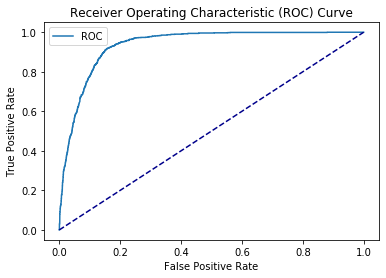

AUC: 0.94


In [114]:
model = SVC(C=100, kernel='linear',probability=True)

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)


In [115]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,20,5)],  "max_iter": [2000], "alpha": [0.001,0.1]}

hyperp_search(classifier,parameters)

f1_train: 0.740057 using {'alpha': 0.1, 'hidden_layer_sizes': (10, 5), 'max_iter': 2000}
f1      train 0.779   test 0.731
precision  train 0.765   test 0.723

[[3174  292]
 [ 270  764]]


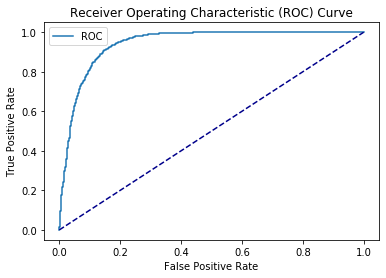

AUC: 0.94


In [116]:
model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.1, max_iter=2000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)


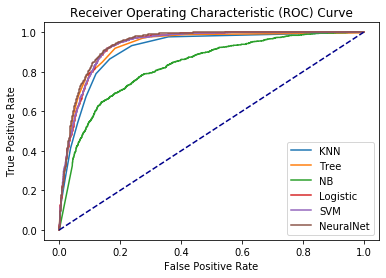

In [117]:
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## Making predictions

In [118]:
df2 = pd.read_csv('telemarketing_pred_withtarget.csv')

In [119]:
#pd.options.mode.chained_assignment = None  # default='warn'

df2_categorical=df2.select_dtypes(include=['object'])

# Categorical
#dummies2 = pd.get_dummies(df2_categorical[['marital', 'education', 'default','housing', 'loan', 'contact',
#       'month', 'poutcome']],drop_first=True) 

dummies2 = pd.get_dummies(df2_categorical[['job', 'education',  'contact',
       'month', 'poutcome']],drop_first=True) 
    
# Numerical
df2_numerical=df2.select_dtypes(include=['int','float'])
df2_numerical['logcampaign']=df2_numerical['campaign'].apply(math.log)
df2_numerical['logduration']=df2_numerical['duration'].apply(math.log)
df2_numerical['logprevious']=df2_numerical['previous'].apply(lambda x: math.log(x+1))

# Scaling - WE MUST USE THE SAME SCALING OF THE TRAIN!
scaled_df2 = pd.DataFrame(scaler.transform(df2_numerical))
scaled_df2.columns = df2_numerical.columns

# Feature selection
X2_numerical=scaled_df2[['age','logduration','logcampaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
X2=pd.concat([dummies2,X2_numerical], axis = 1)


In [120]:
X.columns

Index(['marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_nonexistent', 'poutcome_success', 'age',
       'logduration', 'logcampaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [121]:
y2_pred = model_tree.predict(X2)

ValueError: Number of features of the model must match the input. Model n_features is 36 and input n_features is 38 

In [122]:
X2.columns

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success', 'age', 'logduration',
       'logcampaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [123]:
X.columns

Index(['marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_nonexistent', 'poutcome_success', 'age',
       'logduration', 'logcampaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [124]:
list(set(X) - set(X2))

['loan_unknown',
 'default_yes',
 'default_unknown',
 'marital_married',
 'housing_yes',
 'marital_single',
 'loan_yes',
 'marital_unknown',
 'housing_unknown']

In [125]:
X2['default_yes']=0

In [126]:
#y2_pred = model_MLP.predict(X2)

model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)
model_tree.fit(X, y)

y2_pred = model_tree.predict(X2)

y2=df2.target
print("f1_test: ", f1_score(y2, y2_pred))
print(confusion_matrix(y2, y2_pred))
print(classification_report(y2, y2_pred))

ValueError: Number of features of the model must match the input. Model n_features is 36 and input n_features is 39 

In [127]:
X2

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,poutcome_success,age,logduration,logcampaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_yes
0,0,0,0,0,0,0,0,0,0,0,...,0,-1.184590,0.153972,1.117911,-1.036841,-1.096339,-1.188431,-1.187102,-0.739913,0
1,0,0,0,0,0,0,0,0,0,0,...,0,-0.459227,0.115476,-0.921744,-1.036841,-0.791833,-1.373844,-1.110364,-0.739913,0
2,0,0,0,0,0,0,1,0,0,0,...,0,-0.096546,0.519844,0.694644,0.728330,0.745760,0.830517,0.794858,0.429467,0
3,0,0,0,0,0,1,0,0,0,0,...,0,-0.549897,-1.171076,0.694644,0.910934,-0.174453,0.892321,0.855035,0.901546,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0.991498,0.270428,-0.921744,-1.036841,-1.096339,-1.188431,-1.168884,-0.739913,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,1,0,0,0,0,0,0,0,...,0,-1.003249,-0.762644,0.098083,-0.002086,-0.582693,-0.323168,0.364237,0.490545,0
4996,1,0,0,0,0,0,0,0,0,0,...,0,0.719487,-1.171076,1.714472,0.910934,1.533797,-0.281965,0.799275,0.901546,0
4997,0,0,0,0,0,0,0,0,1,0,...,0,-0.005875,-0.466426,-0.921744,-0.002086,-0.582693,-0.323168,0.406747,0.490545,0
4998,0,0,0,0,0,0,1,0,0,0,...,0,-1.184590,-1.957250,1.446222,-1.036841,-1.096339,-1.188431,-1.199248,-0.739913,0


## Let fix the variables

In [128]:
X2.columns

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success', 'age', 'logduration',
       'logcampaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'default_yes'],
      dtype='object')

In [129]:
dummies = pd.get_dummies(df_categorical[['marital', 'education','housing', 'loan', 'contact',
       'month', 'poutcome']],drop_first=True) 
dummies2 = pd.get_dummies(df2_categorical[['marital', 'education','housing', 'loan', 'contact',
       'month', 'poutcome']],drop_first=True) 


X=pd.concat([dummies,X_numerical], axis=1)
X2=pd.concat([dummies2,X2_numerical], axis=1)


In [130]:
print(X.columns)
print(X2.columns)


Index(['marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success', 'age', 'logduration',
       'logcampaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')
Index(['marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_unknown',
       'housing_yes', 'loan_unkn

In [131]:
# Retrain the model (with the entire dataset)

model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)
model_tree.fit(X, y)

y_tree = model_tree.predict(X2)

y2=df2.target
print("f1_test: ", f1_score(y2,y_tree))
print(confusion_matrix(y2,y_tree))
print(classification_report(y2,y_tree))

f1_test:  0.7622641509433962
[[3524  284]
 [ 283  909]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3808
           1       0.76      0.76      0.76      1192

    accuracy                           0.89      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.89      0.89      0.89      5000



In [132]:
from sklearn.neural_network import MLPClassifier

model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.1, max_iter=2000)
model_MLP.fit(X, y)

y_MLP = model_MLP.predict(X2)

print("f1_test: ", f1_score(y2,y_MLP))
print(confusion_matrix(y2,y_MLP))
print(classification_report(y2,y_MLP))


f1_test:  0.7721466831479192
[[3510  298]
 [ 255  937]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3808
           1       0.76      0.79      0.77      1192

    accuracy                           0.89      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.89      0.89      0.89      5000



In [133]:
predictions=pd.DataFrame()

predictions['tree']=y_tree
predictions['MLP']=y_MLP

predictions

,tree,MLP
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
4995,0,0
4996,0,0
4997,0,0
4998,0,0


In [134]:
predictions.to_csv('telemarketing_predictions.csv')

In [135]:
df2 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,27,admin.,single,basic.9y,no,yes,no,telephone,may,thu,...,4,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,0
1,35,admin.,married,university.degree,no,no,no,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
2,39,services,married,basic.9y,no,yes,no,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
3,34,self-employed,married,basic.9y,unknown,yes,no,cellular,aug,mon,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
4,51,entrepreneur,married,professional.course,unknown,no,no,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,housemaid,married,high.school,no,no,no,cellular,nov,thu,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,0
4996,48,blue-collar,married,professional.course,no,no,no,telephone,jun,tue,...,6,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0
4997,40,technician,married,professional.course,no,yes,no,cellular,nov,tue,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
4998,27,services,single,university.degree,no,yes,yes,cellular,may,mon,...,5,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0


In [136]:
y2=df2.target

print("f1_test: ", f1_score(y2,y_tree))
print(confusion_matrix(y2,y_tree))
print(classification_report(y2,y_tree))

f1_test:  0.7622641509433962
[[3524  284]
 [ 283  909]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3808
           1       0.76      0.76      0.76      1192

    accuracy                           0.89      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.89      0.89      0.89      5000



In [137]:
print("f1_test: ", f1_score(y2,y_MLP))
print(confusion_matrix(y2,y_MLP))
print(classification_report(y2,y_MLP))

f1_test:  0.7721466831479192
[[3510  298]
 [ 255  937]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3808
           1       0.76      0.79      0.77      1192

    accuracy                           0.89      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.89      0.89      0.89      5000

